In [41]:
import pandas as pd
import numpy as np
import re, string
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake["fake"] = 1
true["fake"] = 0
df = pd.concat([fake, true]).reset_index(drop = True)

In [4]:
df.drop(["title","subject","date"], axis=1, inplace=True)

In [5]:
df.head()

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [6]:
lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

In [7]:
def data_cleaning(text):
    text = text.lower() # converts all letters into lowercase
    text = lemmatizer.lemmatize(text) # convert a same meaning word in a simple same word    
    text = re.sub('https?://\S+|www\.\S+', '', text) # removes web urls
    text = re.sub('[^a-zA-Z\s]', '', text) # removes anything that is not a letter and whitespaces
    return text

In [8]:
df['text'] = df['text'].apply(data_cleaning)
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [9]:
df.head()

,text,fake
0,donald trump wish americans happy new year lea...,1
1,house intelligence committee chairman devin nu...,1
2,friday revealed former milwaukee sheriff david...,1
3,christmas day donald trump announced would bac...,1
4,pope francis used annual christmas day message...,1


In [10]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

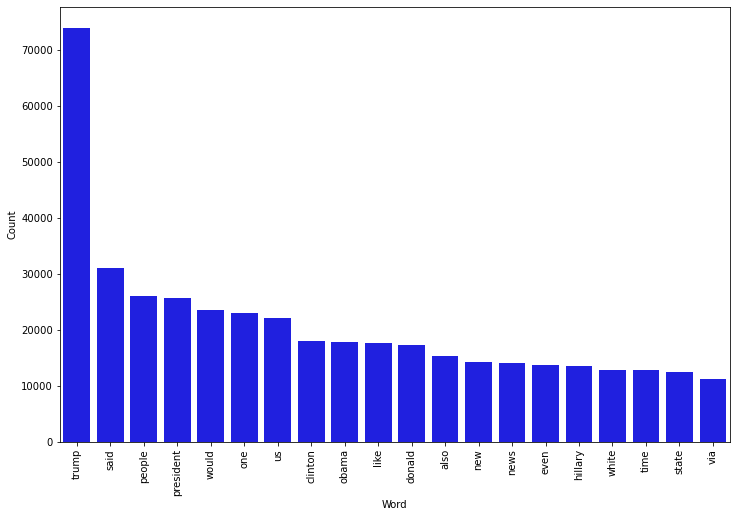

In [11]:
counter(df[df["fake"] == 1], "text", 20)

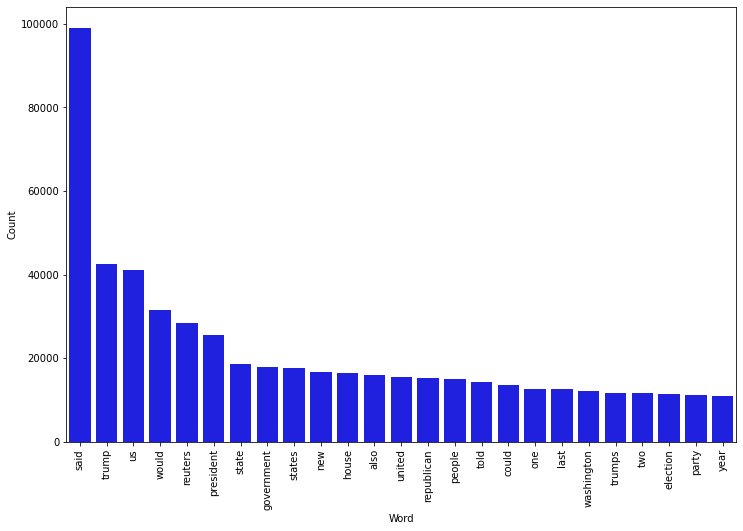

In [12]:
counter(df[df["fake"] == 0], "text", 25)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.fake, test_size=0.20)

In [14]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [51]:
dct = dict()

In [15]:
LR_model = LogisticRegression()
LR_model.fit(xv_train,y_train)

LogisticRegression()

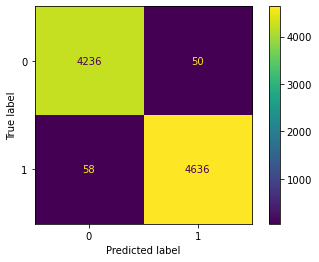

In [16]:
plot_confusion_matrix(LR_model, xv_test, y_test)

In [52]:
dct['LR'] = round(LR_model.score(xv_test, y_test)*100,2)

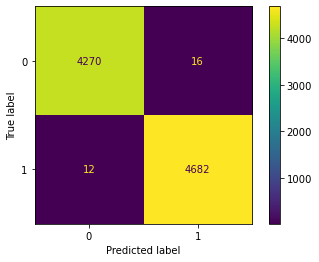

In [18]:
DT_model = DecisionTreeClassifier()
DT_model.fit(xv_train,y_train)
plot_confusion_matrix(DT_model, xv_test, y_test)

In [53]:
dct['DT'] = round(DT_model.score(xv_test, y_test)*100,2)

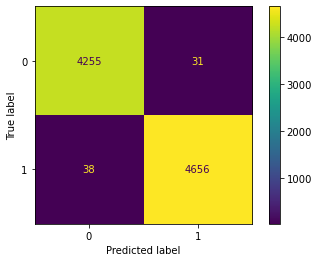

In [20]:
RFC_model= RandomForestClassifier()
RFC_model.fit(xv_train, y_train)
plot_confusion_matrix(RFC_model, xv_test, y_test)

In [54]:
dct['RFC'] = round(RFC_model.score(xv_test, y_test)*100,2)

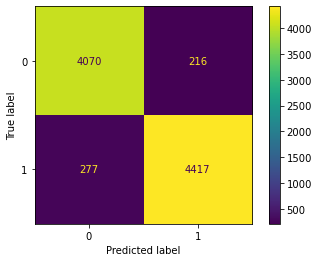

In [22]:
MNB_model = MultinomialNB()
MNB_model.fit(xv_train,y_train)
plot_confusion_matrix(MNB_model, xv_test, y_test)

In [55]:
dct['MNB'] = round(MNB_model.score(xv_test, y_test)*100,2)

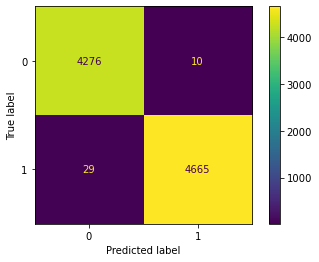

In [24]:
GBC_model = GradientBoostingClassifier()
GBC_model.fit(xv_train,y_train)
plot_confusion_matrix(GBC_model, xv_test, y_test)

In [56]:
dct['GBC'] = round(GBC_model.score(xv_test, y_test)*100,2)

In [26]:
def output_lable(n):
    if n == 1:
        return "Fake News"
    elif n == 0:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(data_cleaning) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR_model.predict(new_xv_test)
    pred_DT = DT_model.predict(new_xv_test)
    pred_RFC = RFC_model.predict(new_xv_test)
    pred_MNB = MNB_model.predict(new_xv_test)
    pred_GBC = GBC_model.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nMNB Prediction: {} \nGBC Prediction: {}"
                 .format(output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_RFC[0]),
                         output_lable(pred_MNB[0]), output_lable(pred_GBC[0])))

In [27]:
news = str(input())
manual_testing(news)

One of the country's longest-serving politicians, he promised voters "safe change" as he worked to kick out the conservative Liberal-National coalition which has been in power since 2013.  Where ousted Prime Minister Scott Morrison is a self-described "bulldozer", Mr Albanese vows to be a "builder".  After the pandemic, which saw Australian states cut off from each other and cities splintered by strict lockdowns, fostering unity is a top priority for the new leader.  "I want to bring Australians together. I want to seek our common purpose and promote unity and optimism, not fear and division," he said in a victory speech on Saturday night. Mr Albanese has earned a reputation as a defender of Australia's free healthcare system, an advocate for the LGBT community, a republican, and a passionate rugby league fan.  The 59-year-old - nicknamed Albo - was raised in social housing by a single mother on a disability pension. He has often cited his upbringing as the foundation for his progressi

In [28]:
new_df = pd.read_csv("clean_test_data.csv")
new_xv_test = vectorization.transform(new_df['text'])

In [29]:
LR_model.predict_proba(new_xv_test)

array([[0.95162411, 0.04837589],
       [0.96046147, 0.03953853],
       [0.92130842, 0.07869158],
       ...,
       [0.80097995, 0.19902005],
       [0.92888992, 0.07111008],
       [0.34487678, 0.65512322]])

In [30]:
LR_model.score(new_xv_test, new_df['fake'])

0.5354919053549191

In [31]:
DT_model.score(new_xv_test, new_df['fake'])

0.48443337484433374

In [32]:
RFC_model.score(new_xv_test, new_df['fake'])

0.526774595267746

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2)

In [35]:
kmeans.fit(xv_train)

KMeans(n_clusters=2)

In [36]:
kmeans.predict(xv_test)

array([1, 1, 1, ..., 1, 0, 1])

In [37]:
kmeans.score(xv_test, y_test)

-8571.098860656713

([<matplotlib.axis.YTick at 0x20c1b14dfd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

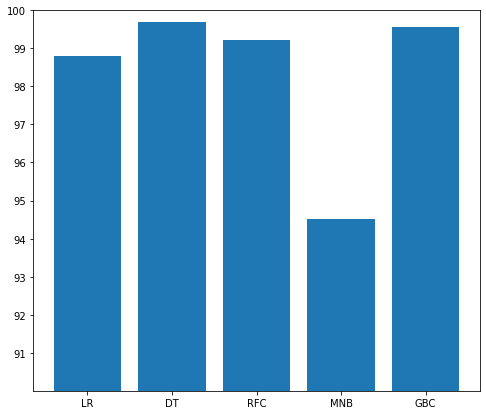

In [57]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))